In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np

from data_loading import read_table_to_df

In [37]:
df = read_table_to_df(table_name="CHURN_DATASET")
df.head()

Data from CHURN_DATASET loaded successfully!


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42,2,0.00,1,True,True,101348.88,True
1,2,15647311,Hill,608.0,Spain,Female,41,1,83807.86,1,False,True,112542.58,False
2,3,15619304,Onio,502.0,France,Female,42,8,159660.80,3,True,False,113931.57,True
3,4,15701354,Boni,699.0,France,Female,39,1,0.00,2,False,False,93826.63,False
4,5,15737888,Mitchell,850.0,Spain,Female,43,2,125510.82,1,True,True,79084.10,False


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  float64
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  bool   
 11  IsActiveMember   10000 non-null  bool   
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  bool   
dtypes: bool(3), float64(3), int64(5), object(3)
memory usage: 888.8+ KB


In [39]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [40]:
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [41]:
df = df.drop(columns=['RowNumber','CustomerId','Surname'])
numerical_cols = ['Age', 'EstimatedSalary', 'Balance','CreditScore', 'NumOfProducts'] 
categorical_cols = ['Geography','Gender', 'HasCrCard', 'IsActiveMember']
target_col = 'Exited'

In [42]:
df[categorical_cols] = df[categorical_cols].astype(object)
df.dtypes

CreditScore        float64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard           object
IsActiveMember      object
EstimatedSalary    float64
Exited                bool
dtype: object

In [43]:
df.shape

(10000, 11)

In [44]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [45]:
df[numerical_cols].describe()

,Age,EstimatedSalary,Balance,CreditScore,NumOfProducts
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,38.921800,100090.239881,76485.889288,650.528800,1.530200
std,10.487806,57510.492818,62397.405202,96.653299,0.581654
min,18.000000,11.580000,0.000000,350.000000,1.000000
25%,32.000000,51002.110000,0.000000,584.000000,1.000000
50%,37.000000,100193.915000,97198.540000,652.000000,1.000000
75%,44.000000,149388.247500,127644.240000,718.000000,2.000000
max,92.000000,199992.480000,250898.090000,850.000000,4.000000


In [46]:
df[categorical_cols].describe()

,Geography,Gender,HasCrCard,IsActiveMember
count,10000,10000,10000,10000
unique,3,2,2,2
top,France,Male,True,True
freq,5014,5457,7055,5151


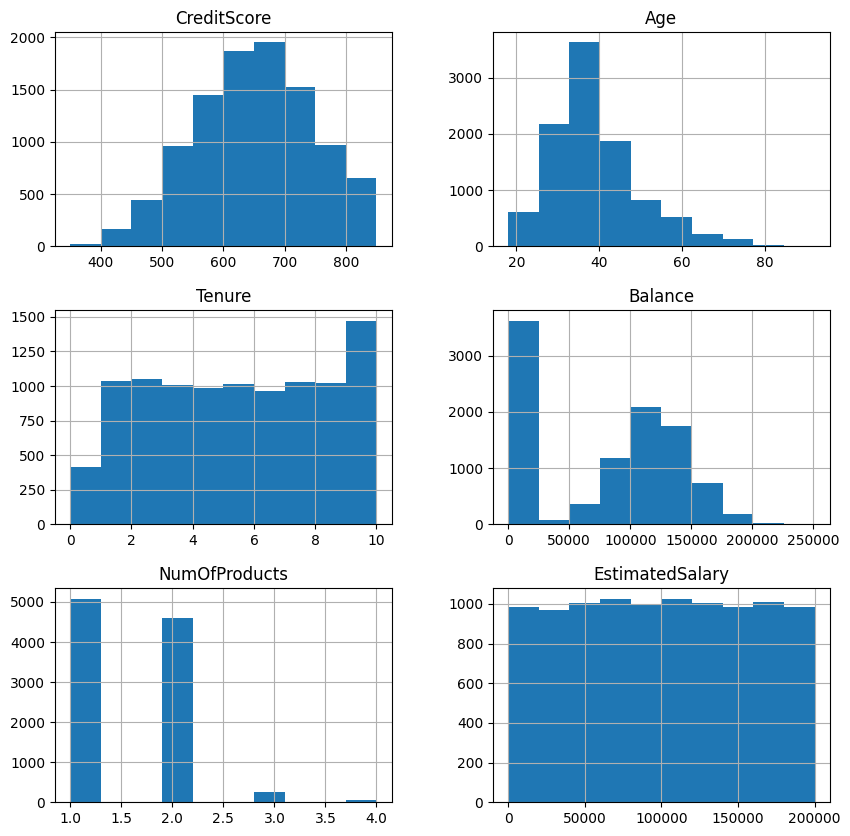

In [47]:
df.hist(figsize=(10, 10)) 
plt.show()

c:\Users\iman.hadi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\iman.hadi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\iman.hadi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\iman.hadi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a fut

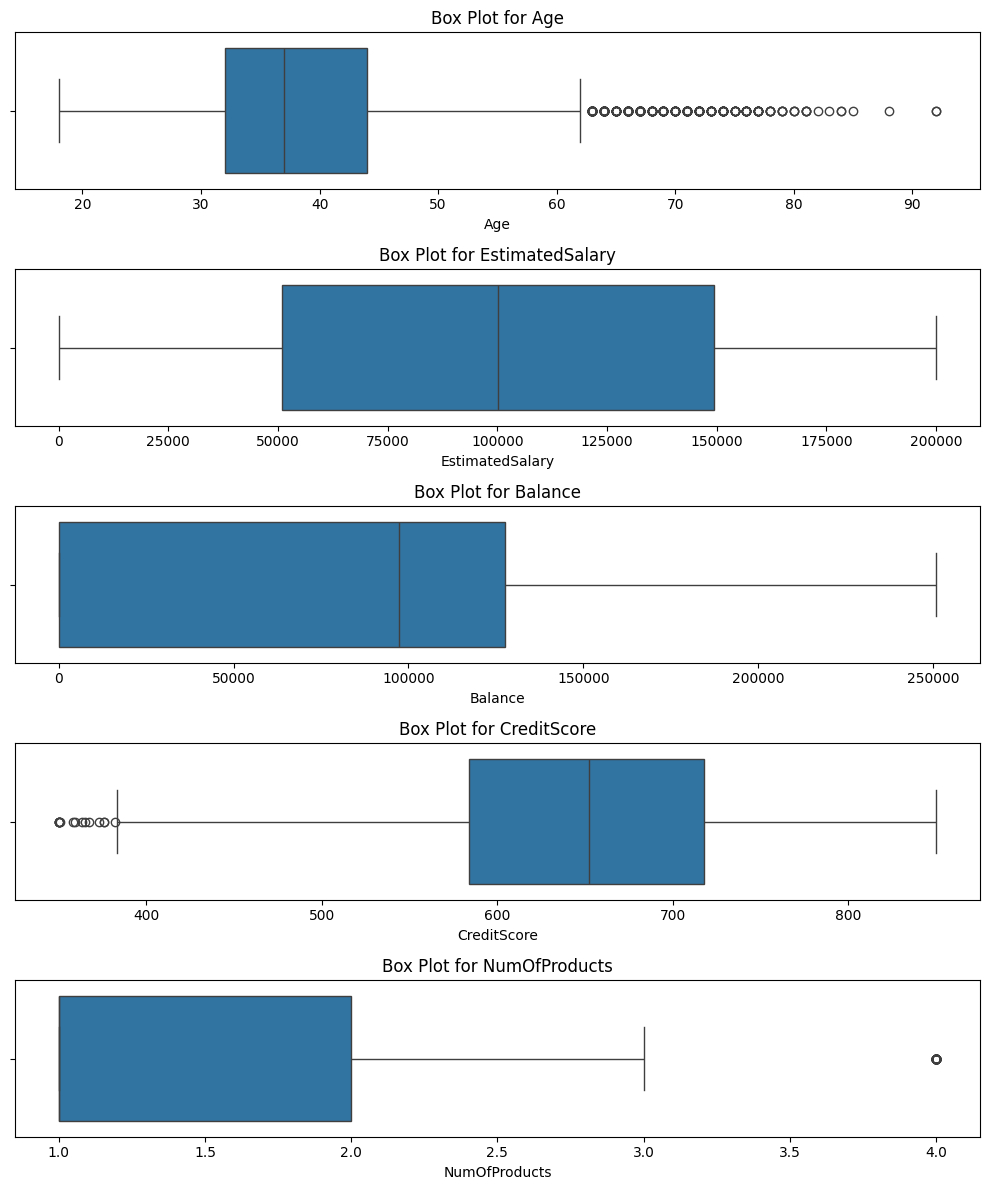

In [48]:
n_cols = 2  
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  

plt.figure(figsize=(n_cols * 5, n_rows * 4))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')
    plt.xlabel(col)

plt.tight_layout() 
plt.show()

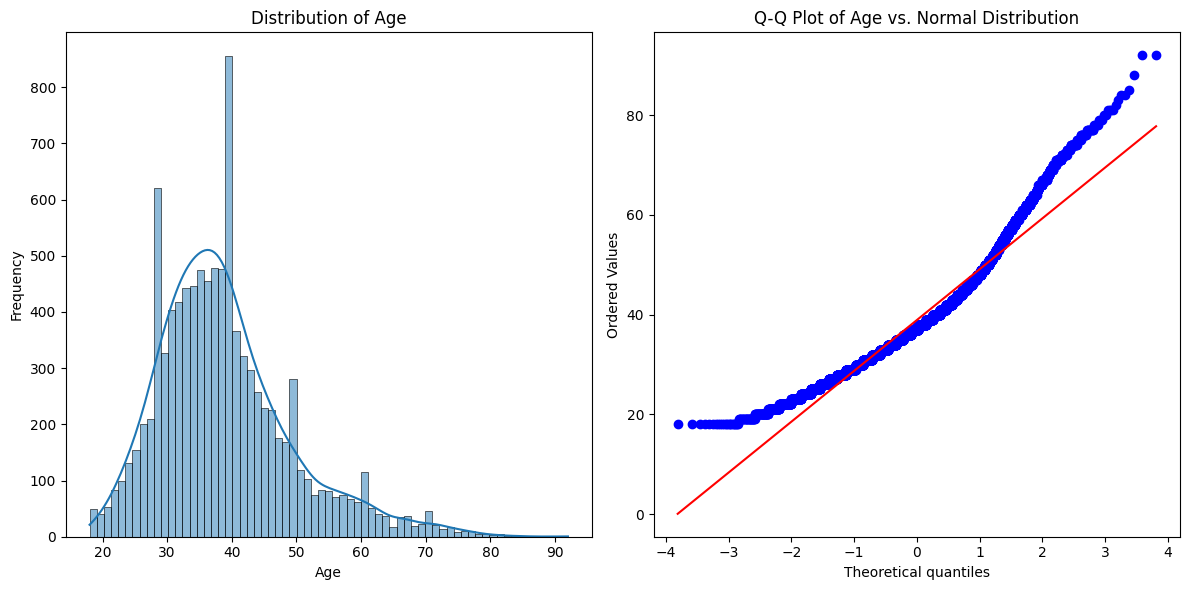

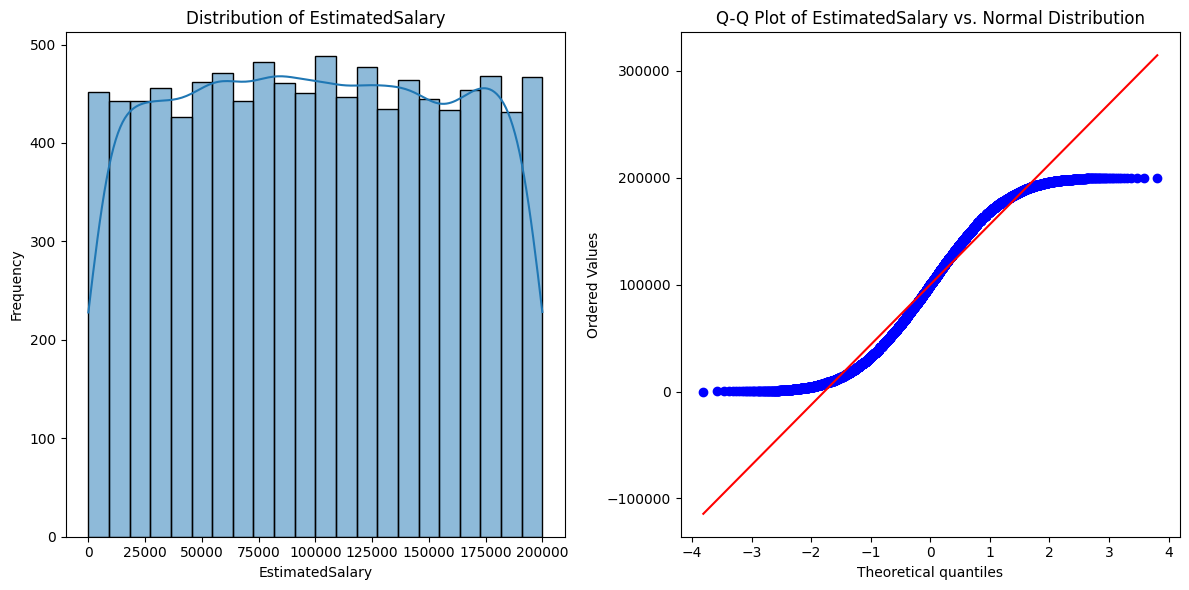

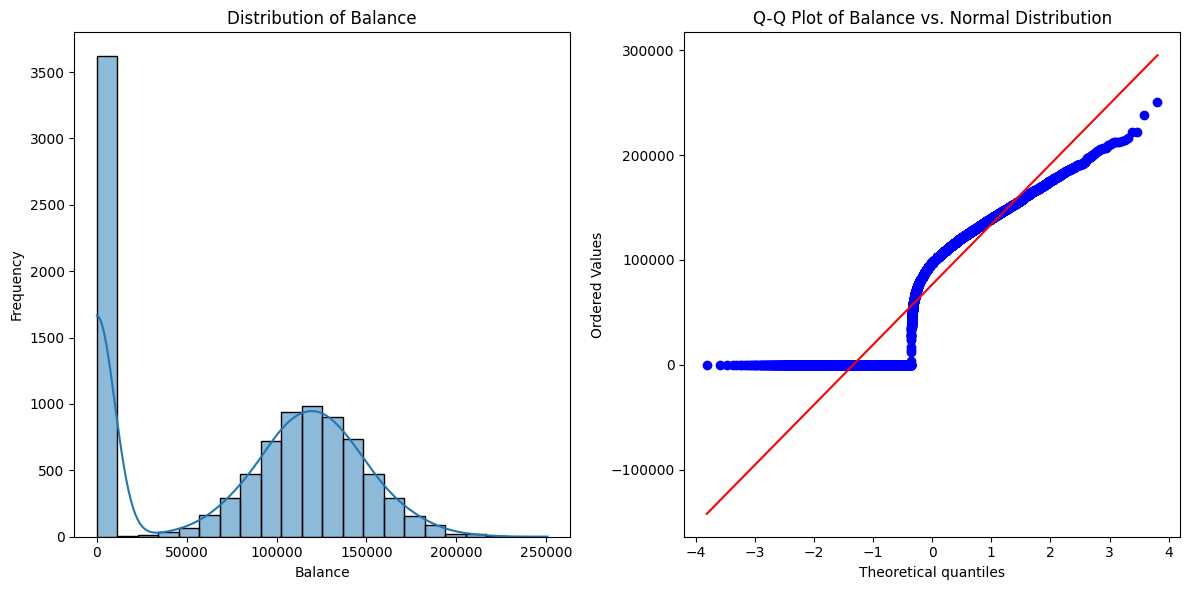

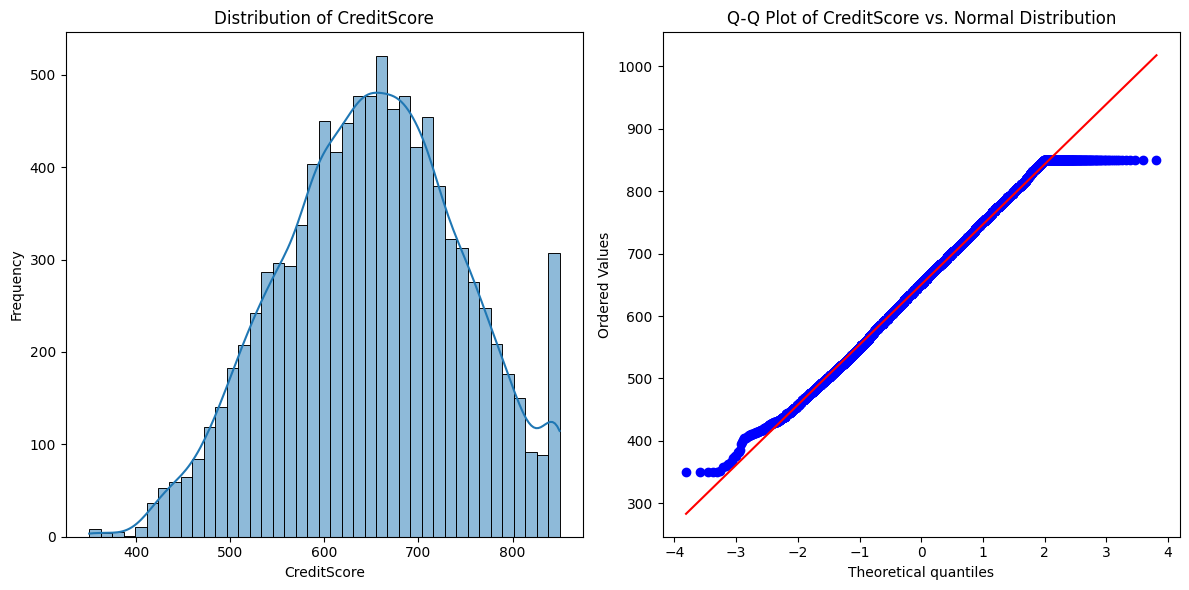

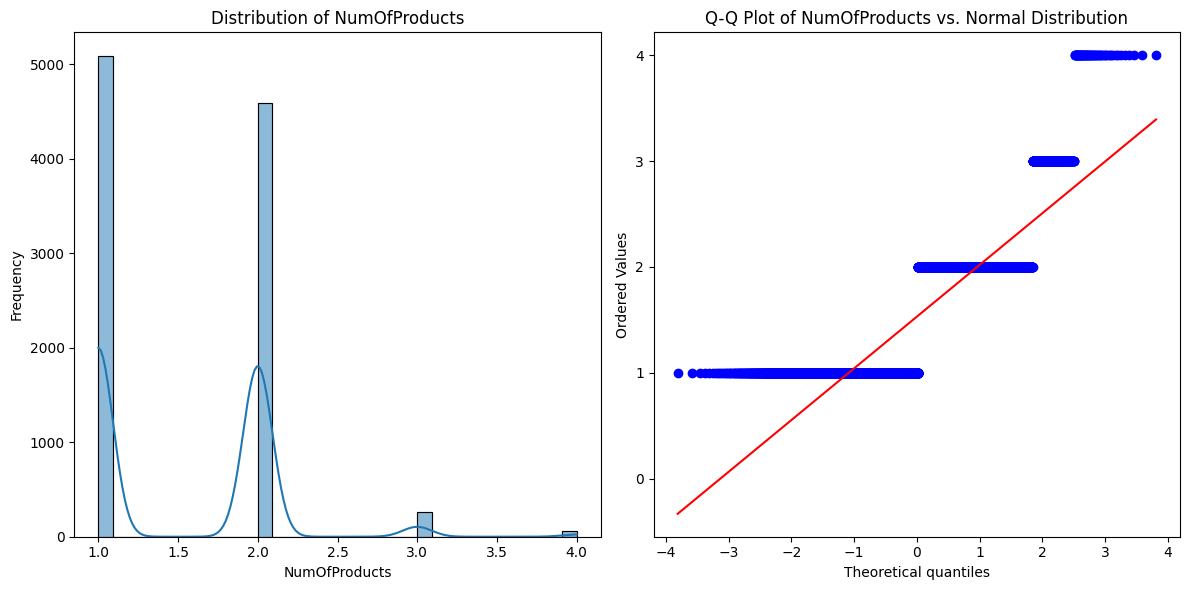

In [49]:
for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    sns.histplot(df[col], kde=True, ax=axes[0]) 
    axes[0].set_title(f'Distribution of {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')

    stats.probplot(df[col], dist="norm", plot=axes[1]) 
    axes[1].set_title(f'Q-Q Plot of {col} vs. Normal Distribution')

    plt.tight_layout()
    plt.show()

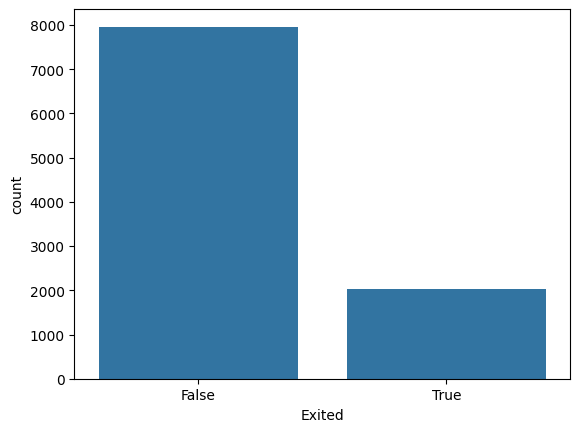

In [50]:
sns.countplot(x='Exited', data=df)
plt.show()

In [51]:
print("Value counts and percentage for {target_col}:")

value_counts = df[target_col].value_counts()
percentage = df[target_col].value_counts(normalize=True) * 100

result = pd.DataFrame({
    'Count': value_counts,
    'Percentage (%)': np.ceil(percentage)
})

result

Value counts and percentage for {target_col}:


,Count,Percentage (%)
Exited,,
False,7963,80.0
True,2037,21.0


In [52]:
print(df[df['Balance'] == 0]['Exited'].value_counts())

Exited
False    3117
True      500
Name: count, dtype: int64


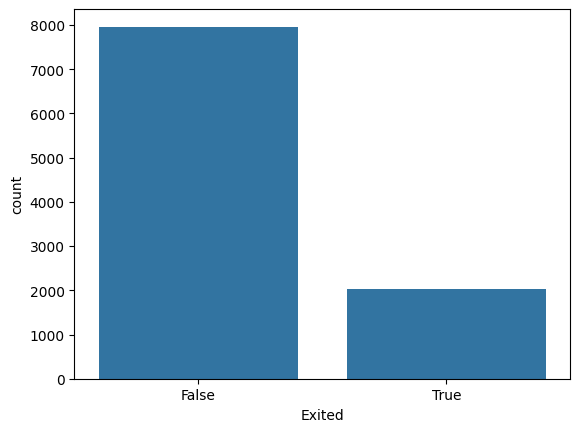

In [53]:
sns.countplot(x='Exited', data=df)
plt.show()

In [54]:
pd.crosstab(df['Geography'], df['Exited'], normalize='index') * 100

Exited,False,True
Geography,,
France,83.845233,16.154767
Germany,67.556796,32.443204
Spain,83.326605,16.673395


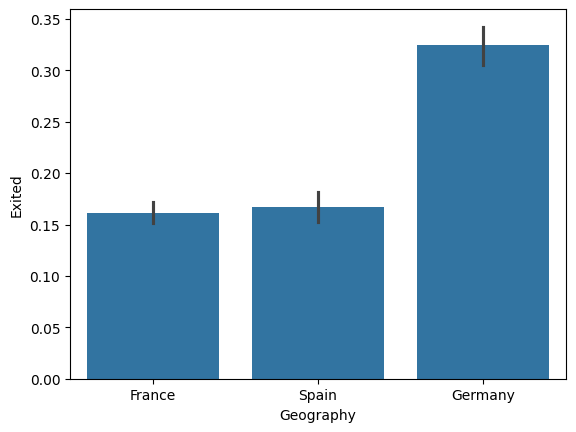

In [55]:
sns.barplot(x='Geography', y='Exited', data=df)
plt.show()

c:\Users\iman.hadi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\iman.hadi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


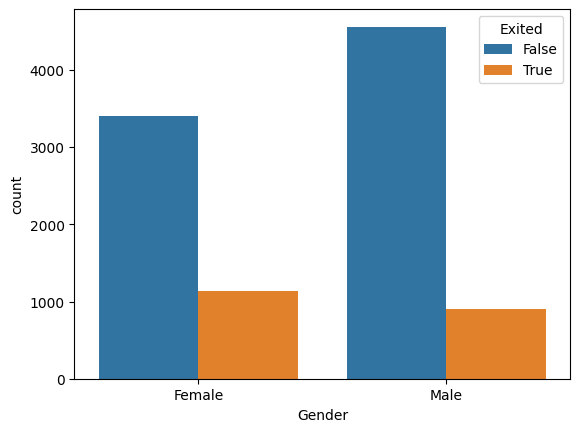

In [56]:
sns.countplot(x='Gender', hue='Exited', data=df)
plt.show()


c:\Users\iman.hadi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\iman.hadi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\iman.hadi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = gr

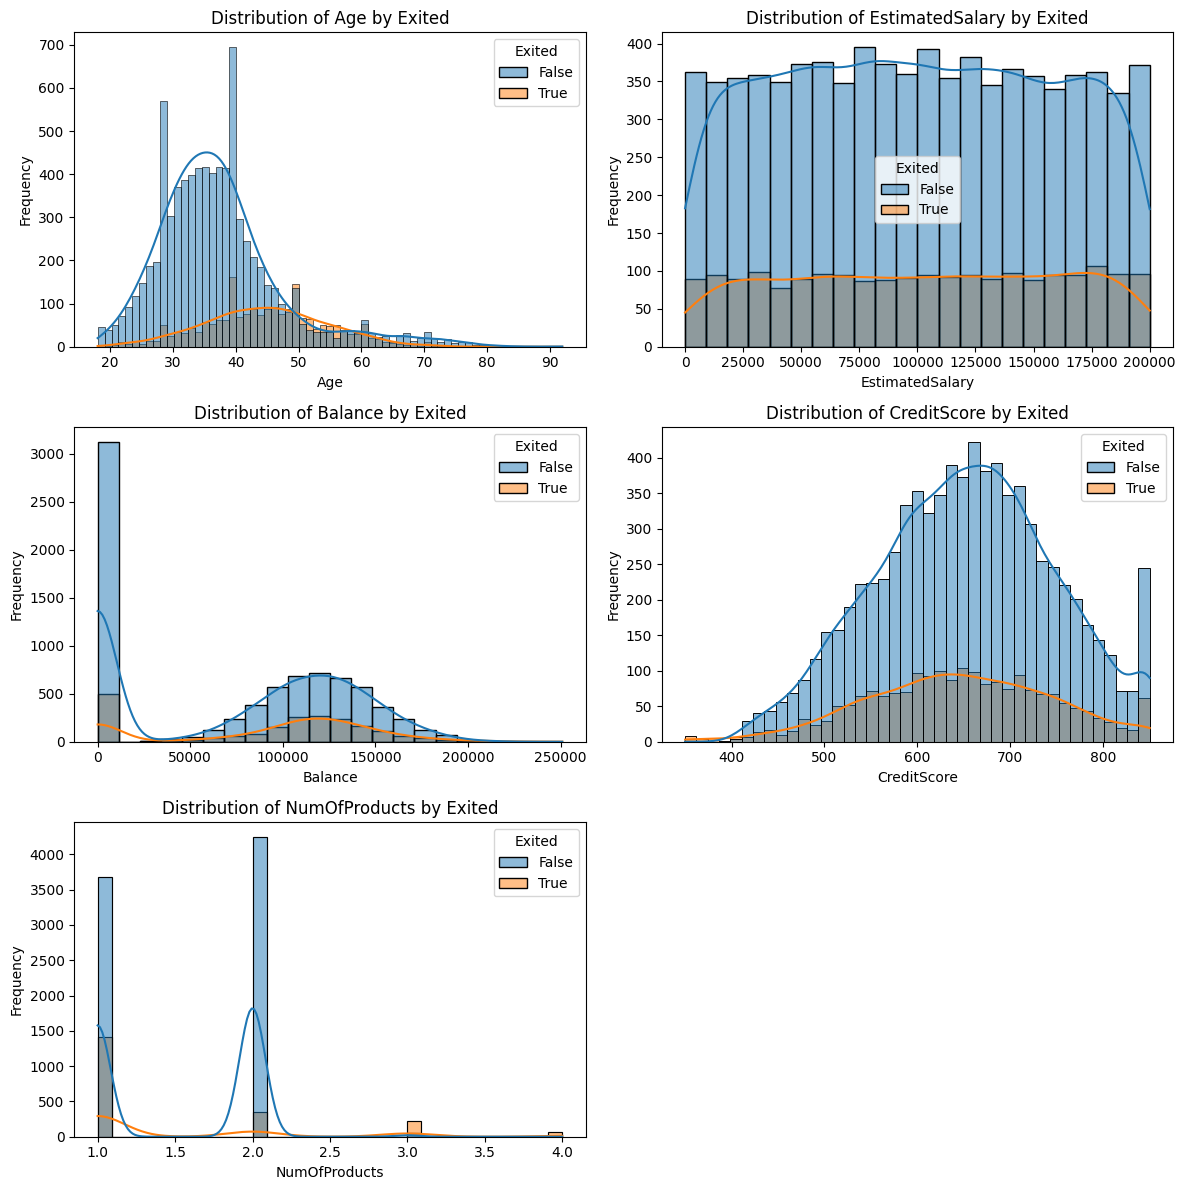

In [57]:
n_cols = 2
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()  

for ax, col in zip(axes, numerical_cols):
    sns.histplot(data=df, x=col, hue='Exited', kde=True, ax=ax)
    ax.set_title(f'Distribution of {col} by Exited')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

for i in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  
plt.show()


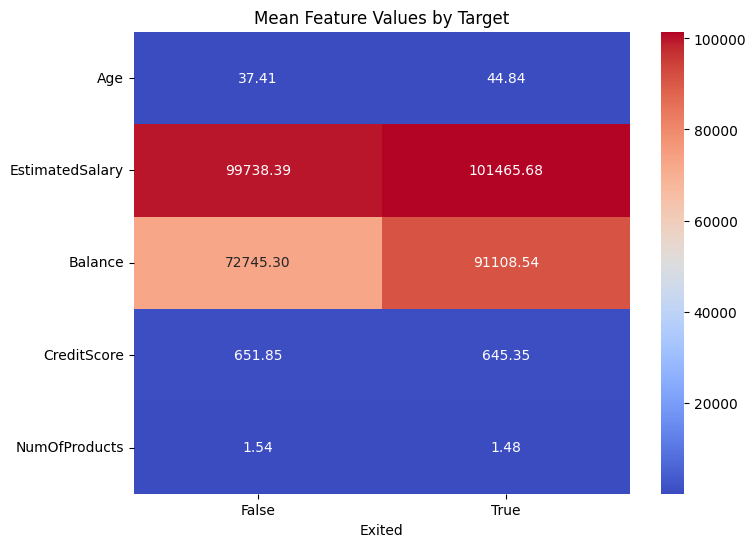

In [58]:
mean_df = df[numerical_cols+[target_col]].groupby('Exited').mean().T  

plt.figure(figsize=(8, 6))
sns.heatmap(mean_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mean Feature Values by Target')
plt.show()

<ul>
    <li><strong>Age</strong>: Individuals categorized as <strong>True</strong> tend to be older on average than those categorized as <strong>False</strong>.</li>
    <li><strong>Estimated Salary</strong>: There’s a slight increase in average salary for the <strong>True</strong> category compared to <strong>False</strong>.</li>
    <li><strong>Balance</strong>: There’s a notable increase in average balance for those labeled <strong>True</strong>.</li>
    <li><strong>Credit Score</strong>: The mean credit score is slightly lower for the <strong>True</strong> category, suggesting that those with a <strong>True</strong> label may have lower credit scores compared to those with a <strong>False</strong> label.</li>
</ul>
